In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [3]:
df_train = df.copy()

In [4]:
df_train['text'] = df_train['Title'] + " " + df_train['Description']

# Clean Text

In [5]:
df_train['text'] = df_train['text'].apply(
    lambda x : x.lower()
)

In [6]:
import re
def preprocess(txt):
        txt = re.sub(r"<.*?>", " ", txt)
        return txt
df_train['text'] = df_train['text'].apply(preprocess)

In [7]:
import string
def remove_punc(txt):
    txt = txt.translate(str.maketrans('','',string.punctuation))
    return txt
df_train['text'] = df_train['text'].apply(remove_punc)

In [8]:
def remove_didgit(txt):
    new = ''
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df_train['text'] = df_train['text'].apply(remove_didgit)

In [9]:
def remove_emojis(txt):
    new = ''
    for i in txt:
        if i.isascii():
            new = new + i
    return new
df_train['text'] = df_train['text'].apply(remove_emojis)

# Remove Stopwords

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(txt):
    cleaned = []
    words = word_tokenize(txt)
    for i in words:
        if not i in stop_words:
            cleaned.append(i)
    return ' '.join(cleaned)
df_train['text'] = df_train['text'].apply(remove_stopwords)

# Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def lem_text(txt):
    words = word_tokenize(txt)
    lematize = []
    for i in words:
        lematize.append(lem.lemmatize(i))
    return ' '.join(lematize)

df_train['text'] = df_train['text'].apply(lem_text)

# Building the model

In [13]:
X = df_train['text']
y = df_train['Class Index']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
from sklearn.svm import SVC

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
y_train = y_train - 1
y_test = y_test - 1   # if you have test labels


# Logistic Regression

In [18]:
model_LR = LogisticRegression()
model_LR.fit(X_train_tfidf , y_train)

LogisticRegression()

In [19]:
y_pred_LR = model_LR.predict(X_test_tfidf)
accuracy_score(y_pred_LR , y_test)

0.91675

In [20]:
confusion_matrix(y_pred_LR , y_test)

array([[5376,   51,  176,  178],
       [ 198, 5952,   44,   50],
       [ 237,   29, 5258,  431],
       [ 145,   26,  433, 5416]])

# Xg Boost

In [21]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_tfidf , y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
y_pred_xgb = model_xgb.predict(X_test_tfidf)
accuracy_score(y_pred_xgb , y_test)

0.8869166666666667

In [23]:
confusion_matrix(y_pred_xgb , y_test)

array([[5236,   93,  202,  221],
       [ 262, 5779,   86,  154],
       [ 244,   78, 5093,  522],
       [ 214,  108,  530, 5178]])

# Training using Nueral Network

In [24]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [25]:
df['Class Index'] = df['Class Index'] - 1

In [29]:
from tensorflow.keras.utils import to_categorical

y_an = to_categorical(df['Class Index'])


In [30]:
X_train_an, X_test_an, y_train_an, y_test_an = train_test_split(df_train['text'], y_an, test_size=0.20, random_state=42)

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 150 
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train_an)
X_train_seq = tokenizer.texts_to_sequences(X_train_an)
X_test_seq = tokenizer.texts_to_sequences(X_test_an)
X_train_pad = pad_sequences(X_train_seq , maxlen = max_length)
X_test_pad = pad_sequences(X_test_seq , maxlen = max_length) 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Embedding , Dropout , GlobalAveragePooling1D

model = Sequential()
model.add(Embedding(input_dim = max_words , output_dim = 128 , input_length = max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4 , activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
history = model.fit(
    X_train_pad,
    y_train_an,
    epochs=5,
    batch_size=64,
    validation_split=0.2,callbacks=[early_stop]
)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.6939 - loss: 0.7746 - val_accuracy: 0.8639 - val_loss: 0.3974
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.8845 - loss: 0.3684 - val_accuracy: 0.8835 - val_loss: 0.3427
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.9059 - loss: 0.3040 - val_accuracy: 0.9121 - val_loss: 0.2697
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 46s 38ms/step - accuracy: 0.9175 - loss: 0.2642 - val_accuracy: 0.8964 - val_loss: 0.3159
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9229 - loss: 0.2433 - val_accuracy: 0.8833 - val_loss: 0.3303


In [50]:
loss, accuracy = model.evaluate(X_test_pad, y_test_an)
print("Test Accuracy:", accuracy)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9102 - loss: 0.2764
Test Accuracy: 0.9101666808128357


 # Visualizations

In [66]:
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}


df_train['Category'] = df_train['Class Index'].map(label_map)


In [67]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(category, n=10):
    text = " ".join(df_train[df_train['Category'] == category]['text'])
    words = text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(n)
    
    words = [w[0] for w in common_words]
    counts = [w[1] for w in common_words]
    
    plt.figure()
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top {n} Words in {category}")
    plt.show()


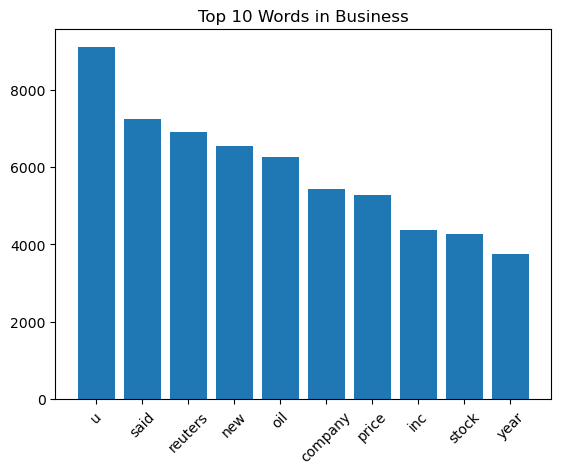

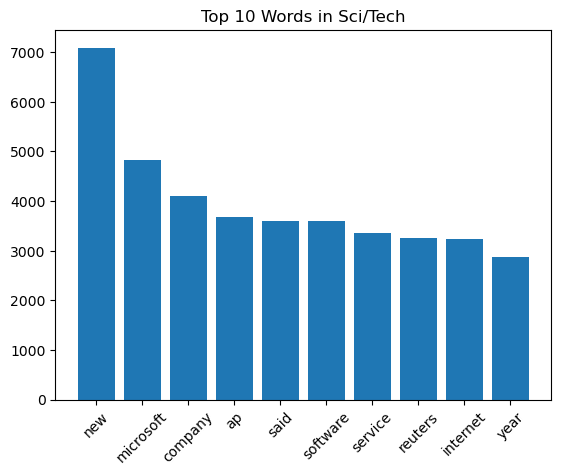

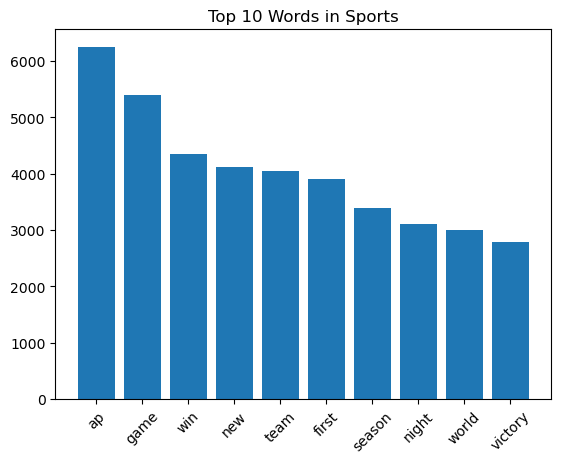

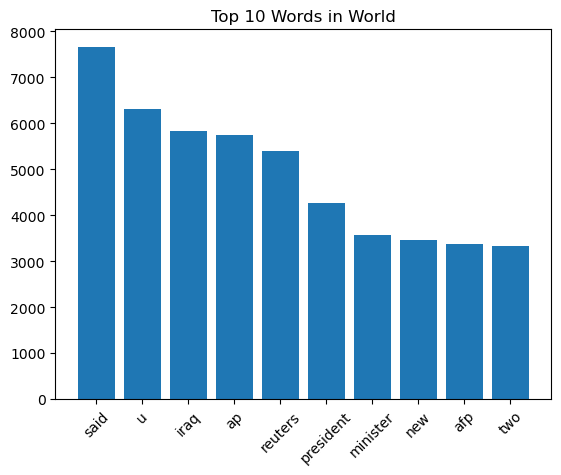

In [68]:
for cat in df_train['Category'].unique():
    plot_top_words(cat)


# Word Cloud

In [69]:
from wordcloud import WordCloud

def plot_wordcloud(category):
    text = " ".join(df_train[df_train['Category'] == category]['text'])
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)
    
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word Cloud - {category}")
    plt.show()


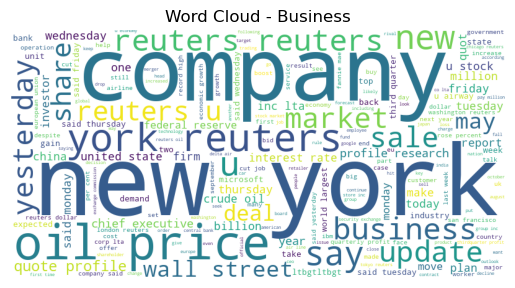

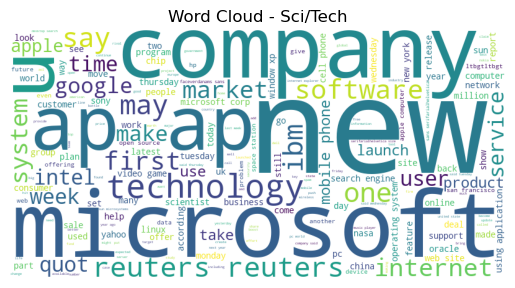

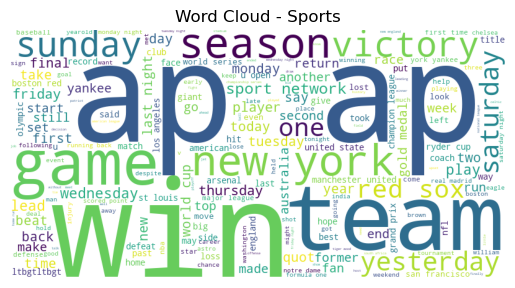

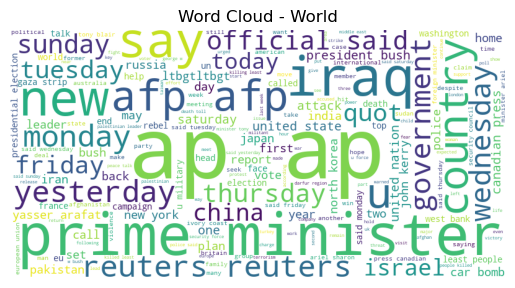

In [70]:
for cat in df_train['Category'].unique():
    plot_wordcloud(cat)
